In [1]:
import os, inspect
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
print(main_dir)


/Users/semvijverberg/surfdrive/Scripts/RGCPD


## Initialize RGCPD class
args:
- list_of_name_path
- start_end_TVdate

        list_of_name_path : list of name, path tuples. 
        Convention: first entry should be (name, path) of target variable (TV).
        list_of_name_path = [('TVname', 'TVpath'), ('prec_name1', 'prec_path1')]
        
        TV period : tuple of start- and enddate in format ('mm-dd', 'mm-dd')

In [2]:
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
rg = RGCPD(path_outmain=os.path.join(main_dir,'data'))

4 cpu's detected
initializing with test data


Post-process input data 
args:
- loadleap=False
- seldates=None 
- selbox=None,
- format_lon='east_west',
- detrend=True
- anomaly=True

In [3]:
rg.pp_precursors()

Loaded post-processed data of sst_test



### Post-processing Target Variable

In [4]:
rg.pp_TV()

original tfreq of imported response variable is converted to desired tfreq
Detrending Respone Variable.
Performing 3 day rolling mean with gaussian window (std=1.5) to get better interannual statistics
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years


In [5]:
rg.traintest?

Signature: rg.traintest(method='no_train_test_split', seed=1, kwrgs_events=None)
Docstring:
Splits the training and test dates, either via cross-validation or
via a simple single split.
agrs:
'method'        : str referring to method to split train test, see
                  options for method below.
seed            : the seed to draw random samples for train test split
kwrgs_events    : dict needed to create binary event timeseries, which
                  is used to create stratified folds.
                  See func_fc.Ev_timeseries? for more info.

Options for method:
(1) random{int}   :   with the int(ex['method'][6:8]) determining the amount of folds
(2) ran_strat{int}:   random stratified folds, stratified based upon events,
                      requires kwrgs_events.
(3) leave{int}    :   chronologically split train and test years.
(4) split{int}    :   split dataset into single train and test set
(5) no_train_test_split
# Extra: RV events settings are needed to make balanced

In [6]:
rg.traintest(method='random5')

In [7]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100.0%, trainsize=(256dp, 80%)



In [8]:
rg.cluster_regions(distance_eps=500)

Plotting Corr maps sst_test_labels_init, split 4, lag 10



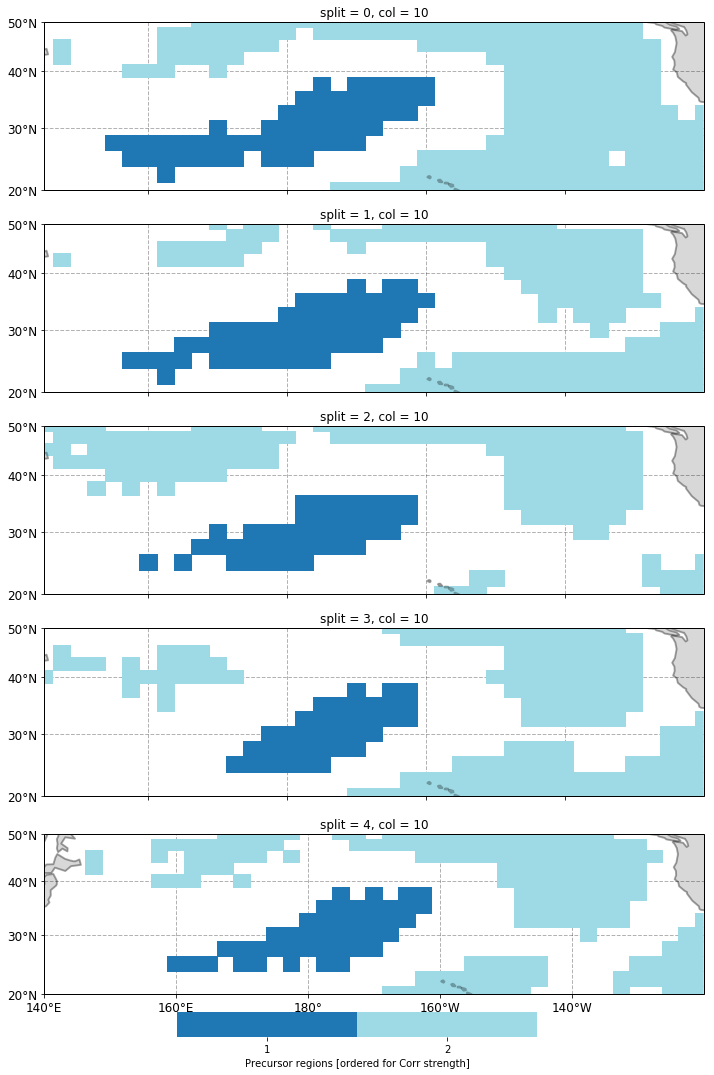

In [9]:
rg.quick_view_labels() 

In [10]:
rg.get_ts_prec()


Getting timeseries from correlation regions
There are [2, 2, 2, 2, 2] regions for sst_test (list of different splits)


In [11]:
rg.df_data

t2m_eUS  10..1..sst_test  10..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949         0.197702         0.158988         True    False
  1979-01-21  5.202951         0.537236        -0.089465         True    False
  1979-01-31  1.976927         0.275490        -0.094195         True    False
  1979-02-10  0.300682         0.595428        -0.250344         True    False
  1979-02-20  3.358494         1.045556        -0.249611         True    False
...                ...              ...              ...          ...      ...
4 2018-11-17  1.427837        -0.469030         0.874667         True    False
  2018-11-27  4.672652        -0.278696         0.828334         True    False
  2018-12-07  1.403350        -0.335989         0.653152         True    False
  2018-12-17  6.580028        -0.193290         0.460272         True    False
  2018-12-27  6.242537        -0.154770         0.312613         True    False

[7200 rows x 5 columns]

In [12]:
rg.PCMCI_df_data()

Could not import rpy package
Could not import r-package RCIT
Progress causal inference - traintest set 100.0%

















Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_test_labels, split 0, lag sst_test_labels_tigr



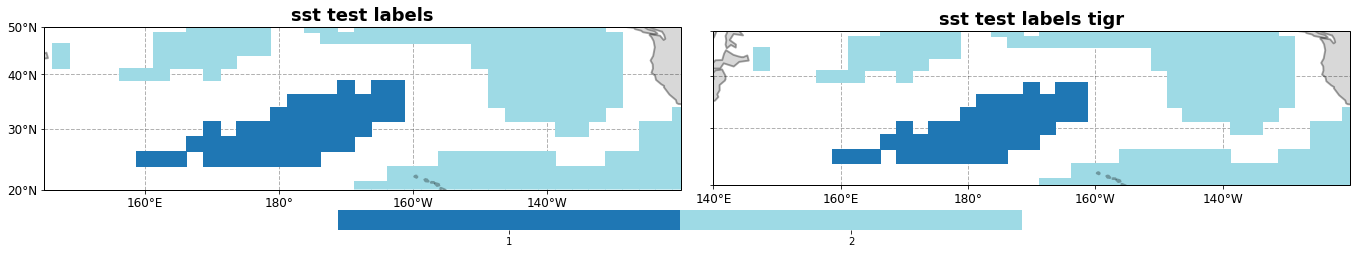

Plotting Corr maps sst_test_labels, split 0, lag robustness sst_test causal



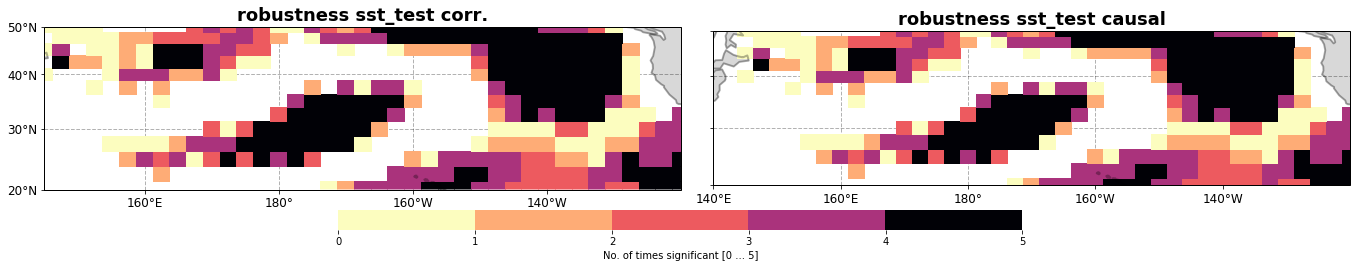


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_test_corr_tigr



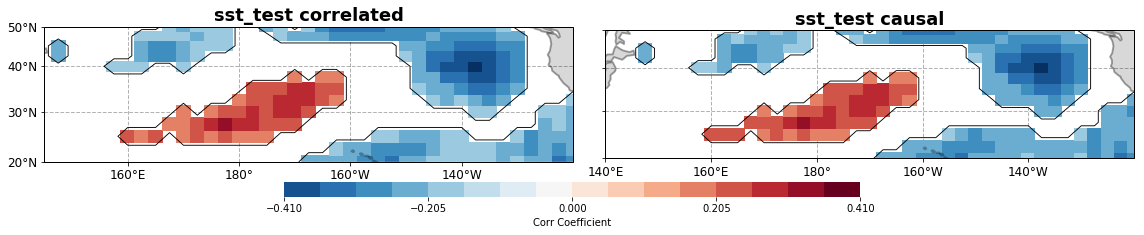

In [13]:
rg.plot_maps_sum()

In [14]:
rg.df_data

t2m_eUS  10..1..sst_test  10..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949         0.197702         0.158988         True    False
  1979-01-21  5.202951         0.537236        -0.089465         True    False
  1979-01-31  1.976927         0.275490        -0.094195         True    False
  1979-02-10  0.300682         0.595428        -0.250344         True    False
  1979-02-20  3.358494         1.045556        -0.249611         True    False
...                ...              ...              ...          ...      ...
4 2018-11-17  1.427837        -0.469030         0.874667         True    False
  2018-11-27  4.672652        -0.278696         0.828334         True    False
  2018-12-07  1.403350        -0.335989         0.653152         True    False
  2018-12-17  6.580028        -0.193290         0.460272         True    False
  2018-12-27  6.242537        -0.154770         0.312613         True    False

[7200 rows x 5 columns]

In [15]:
rg.df_sum

lag_corr  region_number       var  causal  lag_tig
0 t2m_eUS                 0              0   t2m_eUS    True     -1.0
  10..1..sst_test        10              1  sst_test    True      0.0
  10..2..sst_test        10              2  sst_test    True     -1.0
  10..2..sst_test        10              2  sst_test    True      0.0
1 t2m_eUS                 0              0   t2m_eUS    True     -1.0
  10..1..sst_test        10              1  sst_test    True      0.0
  10..2..sst_test        10              2  sst_test    True     -1.0
  10..2..sst_test        10              2  sst_test    True      0.0
2 t2m_eUS                 0              0   t2m_eUS    True     -1.0
  10..1..sst_test        10              1  sst_test    True      0.0
  10..2..sst_test        10              2  sst_test    True      0.0
3 t2m_eUS                 0              0   t2m_eUS    True     -1.0
  10..1..sst_test        10              1  sst_test    True      0.0
  10..2..sst_test        10              2  sst_test    True      0.0
4 t2m_eUS                 0              0   t2m_eUS    True     -1.0
  10..1..sst_test        10              1  sst_test    True      0.0
  10..2..sst_test        10              2  sst_test    True      0.0

In [16]:
rg.store_df_PCMCI()

Data stored in 
/Users/semvijverberg/surfdrive/Scripts/RGCPD/data/eUS_10jun-19aug_lag10-10/random5_s1/None_at0.01_tau_0-1_conds_dimNone_combin2_dt10.h5
